# What is the most optimal skill to learn for Data Analysts?

## Methodology

1. Group skills to determine the median salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_CAN = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='Canada')].copy()

In [3]:
df_DA_CAN = df_DA_CAN.dropna(subset=['salary_year_avg']).copy()

df_DA_CAN_exploded = df_DA_CAN.explode('job_skills')

df_DA_CAN_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
48811,105000.0,sql
48811,105000.0,python
48811,105000.0,javascript
48811,105000.0,bigquery
48811,105000.0,tableau


In [11]:
df_DA_skills = df_DA_CAN_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending = False)

df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count', 'median':'median_salary'})

da_job_count = len(df_DA_CAN)

df_DA_skills['skill_percent']=df_DA_skills['skill_count']/da_job_count*100

skill_percent = 7

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,17,99150.00,54.838710
python,14,99825.00,45.161290
tableau,10,98825.00,32.258065
excel,9,98500.00,29.032258
sas,8,98500.00,25.806452
power bi,5,75000.00,16.129032
vba,4,84500.00,12.903226
sheets,4,99500.00,12.903226
spark,4,109795.25,12.903226


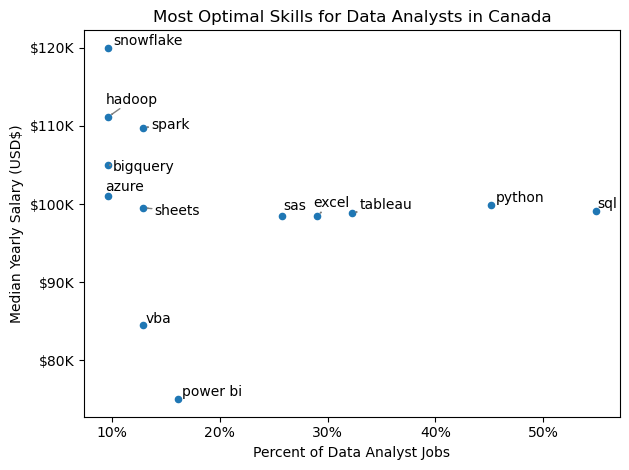

In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from adjustText import adjust_text 
from matplotlib.ticker import PercentFormatter


df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

# Add skill labels
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Labels and title
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary (USD$)')
plt.title('Most Optimal Skills for Data Analysts in Canada')


plt.tight_layout()
plt.show()

In [24]:
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates()

df_technology = df_technology.dropna()

In [25]:
technology_dict = {}

for row in df_technology:
    row_dict = ast.literal_eval(row) #convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict: # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key]=value

# remove duplicates by converting values to set then back to list
for key,value in technology_dict.items():
    technology_dict[key]=list(set(value))

technology_dict

{'analyst_tools': ['spss',
  'looker',
  'sas',
  'ssrs',
  'word',
  'alteryx',
  'splunk',
  'datarobot',
  'cognos',
  'dax',
  'qlik',
  'excel',
  'msaccess',
  'power bi',
  'outlook',
  'sheets',
  'microstrategy',
  'esquisse',
  'powerbi',
  'visio',
  'spreadsheet',
  'sharepoint',
  'nuix',
  'tableau',
  'powerpoint',
  'sap',
  'ms access',
  'ssis'],
 'programming': ['bash',
  'objective-c',
  'typescript',
  'fortran',
  'css',
  'erlang',
  'ruby',
  'perl',
  'sas',
  'solidity',
  'elixir',
  'delphi',
  'mongo',
  't-sql',
  'java',
  'html',
  'f#',
  'nosql',
  'crystal',
  'clojure',
  'no-sql',
  'golang',
  'kotlin',
  'pascal',
  'php',
  'shell',
  'vb.net',
  'haskell',
  'c',
  'sass',
  'sql',
  'python',
  'r',
  'dart',
  'go',
  'ocaml',
  'c#',
  'mongodb',
  'c++',
  'javascript',
  'vba',
  'matlab',
  'lua',
  'scala',
  'assembly',
  'powershell',
  'visualbasic',
  'rust',
  'swift',
  'julia',
  'apl',
  'visual basic',
  'groovy',
  'cobol',
  'l

In [26]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,spss
0,analyst_tools,looker
0,analyst_tools,sas
0,analyst_tools,ssrs
0,analyst_tools,word
...,...,...
9,sync,webex
9,sync,unify
9,sync,symphony
9,sync,google chat


In [29]:
# merge df_DA_skills and df_technology
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,17,99150.00,54.838710,programming,sql
1,14,99825.00,45.161290,programming,python
2,10,98825.00,32.258065,analyst_tools,tableau
3,9,98500.00,29.032258,analyst_tools,excel
4,8,98500.00,25.806452,analyst_tools,sas
5,8,98500.00,25.806452,programming,sas
6,5,75000.00,16.129032,analyst_tools,power bi
7,4,84500.00,12.903226,programming,vba
8,4,99500.00,12.903226,analyst_tools,sheets
9,4,109795.25,12.903226,libraries,spark


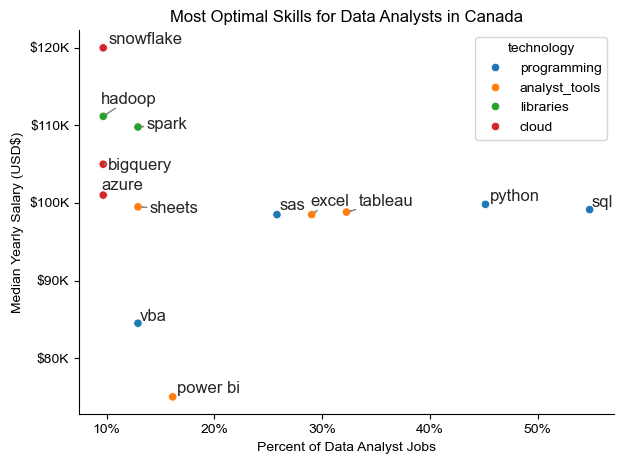

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from adjustText import adjust_text 
from matplotlib.ticker import PercentFormatter


#df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')


sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Add skill labels
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Labels and title
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary (USD$)')
plt.title('Most Optimal Skills for Data Analysts in Canada')


plt.tight_layout()
plt.show()